In [87]:
import keras
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Setting seed for reproducability
np.random.seed(1234)  
PYTHONHASHSEED = 0
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from keras.models import Sequential,model_from_json
from keras.layers import Dense, Dropout, LSTM, Activation
%matplotlib inline
from decimal import Decimal
import warnings
warnings.filterwarnings("ignore")
import pickle
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.preprocessing import Normalizer, MinMaxScaler
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

In [88]:
df=pd.read_csv('C:\\Users\\lengada1\\NCSU\\DC_ten_skus.csv')
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.weekday_name
day_dummy=pd.get_dummies(df.Day)
df=pd.concat([df,day_dummy],axis=1)
df.drop(['Day','Date'],inplace=True,axis=1)

y=df['Sales']


In [89]:
df.head()
df.shape

(942, 16)

In [90]:
X=df.drop(['id','DayOfWeek','Customers','Sales'],inplace=False,axis=1)
X.head()

,Open,Promo,SchoolHoliday,Year,Month,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,10,2013,1,0,0,0,0,0,1,0
1,10,0,10,2013,1,0,0,0,0,0,0,1
2,10,0,8,2013,1,0,0,0,0,1,0,0
3,10,0,8,2013,1,1,0,0,0,0,0,0
4,10,0,1,2013,1,0,0,1,0,0,0,0


In [91]:
for obs in range(1,8):
    X["Sales_T"+str(obs)]=df['Sales'].shift(obs)
X.head()

,Open,Promo,SchoolHoliday,Year,Month,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Sales_T1,Sales_T2,Sales_T3,Sales_T4,Sales_T5,Sales_T6,Sales_T7
0,0,0,10,2013,1,0,0,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10,0,10,2013,1,0,0,0,0,0,0,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,10,0,8,2013,1,0,0,0,0,1,0,0,60436.0,0.0,NaN,NaN,NaN,NaN,NaN
3,10,0,8,2013,1,1,0,0,0,0,0,0,52848.0,60436.0,0.0,NaN,NaN,NaN,NaN
4,10,0,1,2013,1,0,0,1,0,0,0,0,55606.0,52848.0,60436.0,0.0,NaN,NaN,NaN


In [92]:
X['Mov_avg']=pd.rolling_mean(df['Sales'], window=7).shift(1) 
y=y[7:]
X=X[7:]
y.reset_index(drop=True, inplace=True)
X.reset_index(drop=True, inplace=True)
X.head()
X.shape

(935, 20)

In [93]:
def train_model(X, y):
    model = Sequential()
    model.add(Dense(20, input_dim=X.shape[1], activation='linear'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(40, activation='linear'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mse', optimizer='adam', metrics=['mae','mse'])
    model.fit(X, y, epochs=1000, batch_size=10, verbose=0)
    prediction=model.predict(X, verbose=0)
    pred2=pd.DataFrame(prediction)
    scores = model.evaluate(X, y)
    return[pd.concat([pred2,y],axis=1),"%s: %.0f"%  (model.metrics_names[1], scores[1])]

In [106]:
model=train_model(X, y);
print(model[1])

935/935 [==============================] - 0s 135us/step
mean_absolute_error: 4856


In [107]:
dc_pred= model[0].iloc[:,:1]
dc_pred.shape

(935, 1)

In [108]:
sku_pred=pd.read_csv('C:\\Users\\lengada1\\NCSU\\prediction_skus.csv')
sku_pred=sku_pred.iloc[:,1:]

In [109]:
XX=pd.concat([dc_pred,sku_pred],axis=1)

In [110]:
model2=train_model(XX, y);
dc_pred2= model2[0].iloc[:,:1]
print(model2[1])

935/935 [==============================] - 0s 149us/step
mean_absolute_error: 3478


In [113]:
two_predictions=pd.concat([dc_pred,dc_pred2,y],axis=1)
two_predictions.to_csv('C:\\Users\\lengada1\\NCSU\\two_predictions.csv')

In [112]:
two_predictions

,0,0,Sales
0,66990.289062,69494.843750,72552
1,66797.367188,69299.562500,64297
2,58910.621094,62354.382812,64112
3,63285.128906,65791.179688,65006
4,44926.773438,43875.246094,43300
5,2657.696777,-3.215559,0
6,47789.332031,50137.195312,50984
7,53981.199219,50462.671875,48246
8,52316.222656,53174.882812,45400
9,48511.839844,52404.515625,46978


In [10]:
# serialize model to JSON
# also look at joblib.  https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
model_json = model.to_json()
with open("NCSU_DC.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("NCSU_DC.h5")
print("Saved model to disk")

Saved model to disk


In [12]:
# load json and create model
json_file = open('NCSU_DC.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("NCSU_DC.h5")
print("Loaded model from disk")

Loaded model from disk


In [32]:
# evaluate loaded model on test data
loaded_model.compile(loss='mse', optimizer='adam', metrics=['mae','mse'])
score = loaded_model.evaluate(Xs, y, verbose=0)
print("%s: %.0f"%  (loaded_model.metrics_names[1], score[1]))
print("%s: %.1f"%  (loaded_model.metrics_names[2], score[2]/10000000))

mean_absolute_error: 3687
mean_squared_error: 2.9


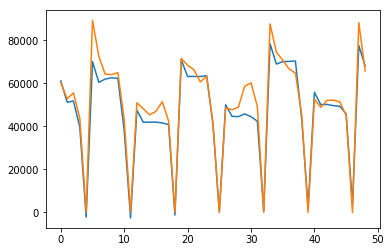

In [437]:
pred2=pd.DataFrame(prediction2)
pred3=pd.concat([pred2,y],axis=1)
#pred3.head()

plt.plot(pred3.iloc[:50,0]   ) 
plt.plot(pred3.iloc[:50,1]   )

#plt.show()